In [78]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Basic plotting

@TODO

# Discriminant functions

## Case I

Given a diagonal covariance matrix:
$$\Sigma=\sigma^2 I$$

The discriminant function can be calculated as:

$$g_i (x)=-\frac{1}{2\sigma^2}||x-\mu_i||^2 + ln(P(\omega_i))$$

Furthermore, if the priors ($P(\omega_i)$) are equal, it simplifies to:

$$g_i (x)=-\frac{1}{2\sigma ^2}||x-\mu_i||^2$$

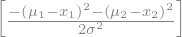

In [79]:
Pi = sym.symbols('P(\omega_i)')

x1, x2 = sym.symbols('x_1, x_2')
sigma = sym.symbols('\sigma')
mu1, mu2 = sym.symbols('\mu_1, \mu_2')
x = sym.Matrix([x1, x2])
mu = sym.Matrix([mu1, mu2])

# sigma = 1.5
# mu = sym.Matrix([3,2])

g = (-1/(2*(sigma**2)))*(sym.transpose(x-mu)*(x-mu)) + sym.Matrix([sym.log(Pi)])

g = (-1/(2*(sigma**2)))*(sym.transpose(x-mu)*(x-mu))
sym.simplify(g)


## Case II

Given a *symmetrical* $\Sigma_i = \Sigma$:
$$
\Sigma=
\left(\begin{array}{cc} 
\sigma_{1} ^2 & . & \sigma_{1,l}\\
. & . & .\\
\sigma_{1,l} & . & \sigma_{l} ^2
\end{array}\right)
$$ 

The discriminant function can be calculated as:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma^-1 (x-\mu) + ln(P(\omega_i))$$

Furthermore, if the priors ($P(\omega_i)$) are equal, it simplifies to:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma^-1 (x-\mu)$$

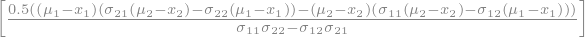

In [80]:
Pi = sym.symbols('P(\omega_i)')

x1, x2 = sym.symbols('x_1, x_2')
s11, s12, s21, s22 = sym.symbols('\sigma_11, \sigma_12, \sigma_21, \sigma_22')
mu1, mu2 = sym.symbols('\mu_1, \mu_2')
x = sym.Matrix([x1, x2])
sigma = sym.Matrix([[s11,s12],[s21,s22]])
mu = sym.Matrix([mu1, mu2])

# sigma = sym.Matrix([[1,2],[3,4]])
# mu = sym.Matrix([3,2])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu)) + sym.Matrix([sym.log(Pi)])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu))
sym.simplify(g)


## Case III

Given a *arbitrary* $\Sigma_i$ (Class dependent),

The discriminant function can be calculated as:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma_i ^-1 (x-\mu) - \frac{1}{2}ln(|\Sigma_i|) + ln(P(\omega_i))$$

Furthermore, if the priors ($P(\omega_i)$) are equal, it simplifies to:

$$g_i=\frac{-1}{2}(x-\mu)^T \Sigma^-1 (x-\mu) - \frac{1}{2}ln(|\Sigma_i|)$$

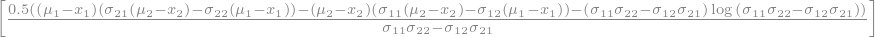

In [81]:
Pi = sym.symbols('P(\omega_i)')

x1, x2 = sym.symbols('x_1, x_2')
s11, s12, s21, s22 = sym.symbols('\sigma_11, \sigma_12, \sigma_21, \sigma_22')
mu1, mu2 = sym.symbols('\mu_1, \mu_2')
x = sym.Matrix([x1, x2])
sigma = sym.Matrix([[s11,s12],[s21,s22]])
mu = sym.Matrix([mu1, mu2])

# sigma = sym.Matrix([[1,2],[3,4]])
# mu = sym.Matrix([3,2])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu)) - sym.Matrix([(1/2)*sym.log(sym.det(sigma))]) + sym.Matrix([sym.log(Pi)])

g = (-1/(2))*(sym.transpose(x-mu)* sigma**-1 *(x-mu)) - sym.Matrix([(1/2)*sym.log(sym.det(sigma))])
sym.simplify(g)



## Testing with exam 2021 version A, task 1 g-i

**Case II**

In [82]:
sigma1 = sym.Matrix([[0.5,0],[0,0.5]])
mu1 = sym.Matrix([-1.5,-1.5])
P1 = 0.2

sigma2 = sym.Matrix([[1,0],[0,0.5]])
mu2 = sym.Matrix([1.5,1.5])
P2 = 0.6

sigma3 = sym.Matrix([[0.5,0],[0,0.5]])
mu3 = sym.Matrix([0,0])
P3 = 0.2

g1 = (-1/(2))*(sym.transpose(x-mu1)* sigma1**-1 *(x-mu1)) + sym.Matrix([sym.log(P1)])
g2 = (-1/(2))*(sym.transpose(x-mu2)* sigma2**-1 *(x-mu2)) + sym.Matrix([sym.log(P2)])
g3 = (-1/(2))*(sym.transpose(x-mu3)* sigma3**-1 *(x-mu3)) + sym.Matrix([sym.log(P3)])
#sym.expand(g1) # Verified, note: Constant wrong, probably due to rounding errors? -5.42 =|= -6.109...
# sym.expand(g2) # Verified, note: Constant wrong, probably due to rounding errors? -3.54 =|= -3.886...
# sym.expand(g3) # Verified, note: Constant wrong, probably due to rounding errors? -0.916 =|= -1.609...

# Decision boundaries

@TODO